---
title: "Régression linéaire code Python"
author: "Jason Suárez"
date: "2024-02-02"
categories: ["Data Science", "Python"]
image: "image.png"
draft: false
---

Dans ce notebook, nous allons voir comment implémenter une régression linéaire en Python. Nous n'allons pas utiliser de bibliothèques pour ce faire, mais nous allons plutôt implémenter l'algorithme de régression linéaire à partir de zéro. Nous allons également voir comment utiliser notre implémentation pour prédire des valeurs à partir d'un ensemble de données.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

(2,)
[1 2]
(2,)
[1 2]


### Chargement et visualisation des données

In [5]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# On élimine les rangées avec des valeurs manquantes
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
# On sépare les données en X et y

X_train = train_data.x
y_train = train_data.y

X_test = test_data.x
y_test = test_data.y

In [7]:
train_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


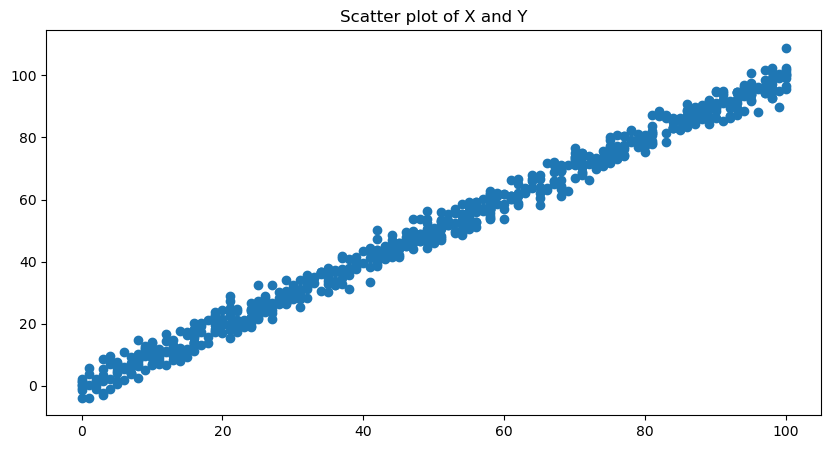

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Scatter plot of X and Y")
plt.scatter(train_data.x, train_data.y)
plt.show()

### Préparation des jeux de données

In [9]:
from utils import dataset_splitter

X_train, X_val, y_train, y_val = dataset_splitter(X_train, y_train, test_size=0.3)

train_size: 70.0% - test_size: 30.0%
X_train: 70%
X_val: 30%


### Standardisation des données


In [14]:
X_train, y_train = standardize_data(X_train, y_train)
X_val, y_val = standardize_data(X_val, y_val)

# On remodèle les données pour qu'elles soient compatibles avec le modèle
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
